In [43]:
import os
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta, Adam, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy, CategoricalHinge, SparseCategoricalCrossentropy

import numpy as np
import time

In [4]:

base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissor_dir = os.path.join(train_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissor_dir = os.path.join(validation_dir, 'scissors')

In [20]:

base_dir = 'rockpaperscissors1'

train_paper_dir = os.path.join(base_dir, 'paper')
train_rock_dir = os.path.join(base_dir, 'rock')
train_scissor_dir = os.path.join(base_dir, 'scissors')

validation_paper_dir = os.path.join(base_dir, 'paper')
validation_rock_dir = os.path.join(base_dir, 'rock')
validation_scissor_dir = os.path.join(base_dir, 'scissors')

In [40]:
train_datagen = image.ImageDataGenerator(
  zoom_range=0.2,
  brightness_range=(0.5, 1.5),
  width_shift_range=0.2,
  vertical_flip=True,
  horizontal_flip=True,
  shear_range=0.2,
  validation_split= 0.4
)

train_generator = train_datagen.flow_from_directory(
  base_dir,
  subset="training",
  target_size=(100, 150),)

validation_generator = train_datagen.flow_from_directory(
  base_dir,
  subset="validation",
  target_size=(100, 150),)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [46]:
now = time.time()
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100, 150, 3)),
  layers.Conv2D(16, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation='softmax')
])

model.compile(loss=CategoricalCrossentropy(),
  optimizer= Adam(),
  metrics=['accuracy']
)

history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator),
  epochs=20,
  verbose=2
)

dur = (time.time() - now) / 60
print(dur)

Epoch 1/20
42/42 - 27s - loss: 0.9538 - accuracy: 0.5175 - val_loss: 0.5533 - val_accuracy: 0.7860
Epoch 2/20
42/42 - 27s - loss: 0.4295 - accuracy: 0.8364 - val_loss: 0.4523 - val_accuracy: 0.7895
Epoch 3/20
42/42 - 26s - loss: 0.3838 - accuracy: 0.8592 - val_loss: 0.3861 - val_accuracy: 0.8696
Epoch 4/20
42/42 - 25s - loss: 0.3122 - accuracy: 0.8858 - val_loss: 0.2123 - val_accuracy: 0.9382
Epoch 5/20
42/42 - 25s - loss: 0.2708 - accuracy: 0.9026 - val_loss: 0.3135 - val_accuracy: 0.9096
Epoch 6/20
42/42 - 25s - loss: 0.3451 - accuracy: 0.8843 - val_loss: 0.2494 - val_accuracy: 0.9245
Epoch 7/20
42/42 - 25s - loss: 0.2037 - accuracy: 0.9353 - val_loss: 0.1847 - val_accuracy: 0.9428
Epoch 8/20
42/42 - 25s - loss: 0.1598 - accuracy: 0.9513 - val_loss: 0.1358 - val_accuracy: 0.9565
Epoch 9/20
42/42 - 26s - loss: 0.1803 - accuracy: 0.9376 - val_loss: 0.1608 - val_accuracy: 0.9474
Epoch 10/20
42/42 - 26s - loss: 0.1292 - accuracy: 0.9589 - val_loss: 0.0884 - val_accuracy: 0.9737
Epoch 11/

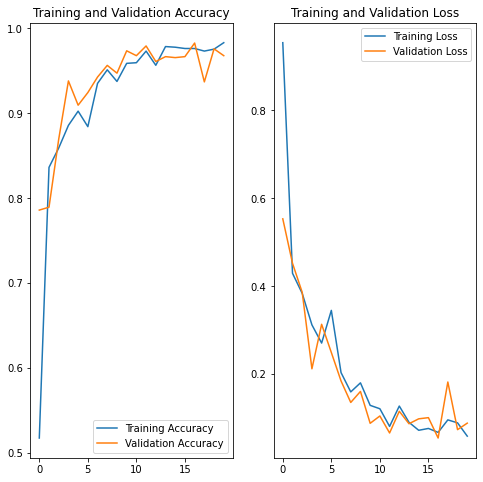

In [47]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [48]:
img1 = image.load_img("rockpaperscissors/valid/rock/N235Vnlue0M9SwaK.png", target_size=(100, 150))

x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

images1 = np.vstack([x1])
classes = model.predict(images1)

print(classes)

[[2.3631983e-02 9.7635037e-01 1.7715578e-05]]


In [49]:
img1 = image.load_img("rockpaperscissors/valid/paper/04l5I8TqdzF9WDMJ.png", target_size=(100, 150))

x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

images1 = np.vstack([x1])
classes = model.predict(images1)

print(classes)

[[1.0000000e+00 1.2034199e-11 9.7197841e-09]]


In [39]:
img1 = image.load_img("rockpaperscissors/test/rock/rocktest.jpg", target_size=(100, 150))

x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

images1 = np.vstack([x1])
classes = model.predict(images1)

print(classes)

[[0.8842661  0.07404282 0.04169103]]
